### This code is from a YouTube video titled "Robust Regression with the L1 Norm [Python] 
##### by Steve Brunton. [link](https://www.youtube.com/watch?v=J_yzmBj_7TU&list=PLMrJAkhIeNNRHP5UA-gIimsXLQyHXxRty&index=15)

Jeonghyeop Kim (12/23/2021)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import minimize

plt.rcParams['figure.figsize'] = [7, 7]
plt.rcParams.update({'font.size': 18})

In [5]:
x = np.sort(4*(np.random.rand(25,1)-0.5),axis=0) 
b = 0.9*x + 0.1*np.random.randn(len(x),1)
atrue = np.linalg.lstsq(x,b,rcond=None)[0]
atrue = atrue.item(0)

b[-1] = -5.5 
aL2 = np.linalg.lstsq(x,b,rcond=None)[0]
aL2 = aL2.item(0)

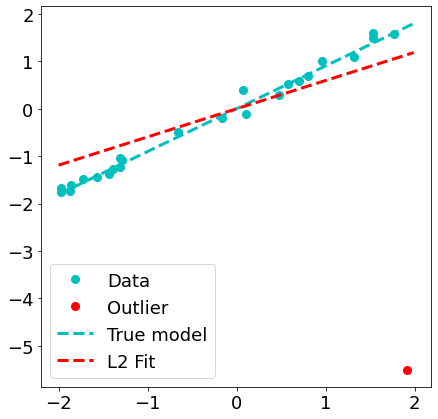

In [7]:
plt.plot(x[:-1],b[:-1],'o',color='c', ms=8, label='Data')
plt.plot(x[-1],b[-1],'o',color='r',ms=8,label='Outlier')

xgrid = np.arange(-2,2,0.01)
plt.plot(xgrid,atrue*xgrid, '--', linewidth=3,color='c', label='True model')
plt.plot(xgrid,aL2*xgrid, '--', linewidth=3,color='r', label='L2 Fit')
plt.legend()
plt.show()

In [8]:
## L1 optimization to reject outlier
def L1_norm(a):
    return np.linalg.norm(a*x-b,ord=1)

a0 = aL2 # initialize to L2 solution
res = minimize(L1_norm, a0)
aL1 = res.x[0]

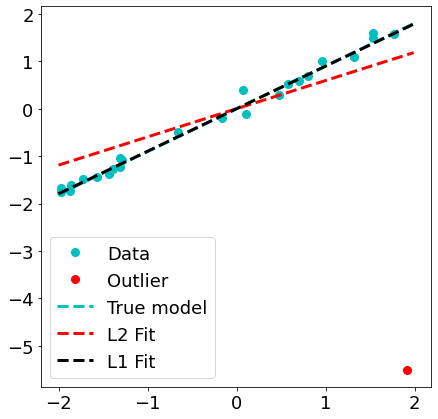

In [9]:
plt.plot(x[:-1],b[:-1],'o',color='c', ms=8, label='Data')
plt.plot(x[-1],b[-1],'o',color='r',ms=8,label='Outlier')

xgrid = np.arange(-2,2,0.01)
plt.plot(xgrid,atrue*xgrid, '--', linewidth=3,color='c', label='True model')
plt.plot(xgrid,aL2*xgrid, '--', linewidth=3,color='r', label='L2 Fit')
plt.plot(xgrid,aL1*xgrid, '--', linewidth=3,color='k', label='L1 Fit')
plt.legend()
plt.show()

L1 FIT is almost the same with the true model!